# Basic Predictors

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn as sk
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics as m
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
refColsDf = pd.read_csv(r'FinalSheets/dfReferenceCols.csv')
fullWordsDf = pd.read_csv(r'FinalSheets/wordsFullDfFinal.csv')
wordsNSDf = pd.read_csv(r'FinalSheets/wordsNoStopDfFinal.csv')
fullWordsHCDF = pd.read_csv(r'FinalSheets/wordsHighCorrDfFinal.csv')
stagsDf = pd.read_csv(r'FinalSheets/sTagRatesDfFinal.csv')
decepDf = pd.read_csv(r'FinalSheets/normalizedDecepCountDfFinal.csv')
decepHCDf = pd.read_csv(r'FinalSheets/normalizedDecepCountHighCorrDfFinal.csv')
combinedHCDf = pd.read_csv(r'FinalSheets/combinedNormalizedHighCorrDfFinal.csv')
winLossDf = pd.read_csv(r'FinalSheets/winLossDfFinal.csv')

decepLowCorrDf = pd.read_csv(r'FinalSheets/normalizedDecepCountLowCorrDfFinal.csv')
wordsLessCommon = pd.read_csv(r'FinalSheets/wordsInMT4SpeechesFinal.csv')
lowCorrWords = pd.read_csv(r'FinalSheets/wordsLowCorrDfFinal.csv')
completeCombinedDf = fullWordsDf.join(decepDf)

pcaFW = pd.read_csv(r'FinalSheets/pcaFW.csv', header=None)
pcaNS = pd.read_csv(r'FinalSheets/pcaNS.csv', header=None)
pcaST = pd.read_csv(r'FinalSheets/pcaST.csv', header=None)
pcaD = pd.read_csv(r'FinalSheets/pcaD.csv', header=None)
pcaCHC = pd.read_csv(r'FinalSheets/pcaCHC.csv', header=None)
pcaWLC = pd.read_csv(r'FinalSheets/pcaWLC.csv', header=None)
pcaCC = pd.read_csv(r'FinalSheets/pcaCC.csv', header=None)

lda1FW = pd.read_csv(r'FinalSheets/lda1FW.csv', header=None)
lda1NS = pd.read_csv(r'FinalSheets/lda1NS.csv', header=None)
lda1ST = pd.read_csv(r'FinalSheets/lda1ST.csv', header=None)
lda1D = pd.read_csv(r'FinalSheets/lda1D.csv', header=None)
lda1CHC = pd.read_csv(r'FinalSheets/lda1CHC.csv', header=None)
lda1WLC = pd.read_csv(r'FinalSheets/lda1WLC.csv', header=None)
lda1CC = pd.read_csv(r'FinalSheets/lda1CC.csv', header=None)

lda2FW = pd.read_csv(r'FinalSheets/lda2FW.csv', header=None)
lda2CHC = pd.read_csv(r'FinalSheets/lda2CHC.csv', header=None)

svd5FW = pd.read_csv(r'FinalSheets/svd5FW.csv', header=None)
svd5NS = pd.read_csv(r'FinalSheets/svd5NS.csv', header=None)
svd5ST = pd.read_csv(r'FinalSheets/svd5ST.csv', header=None)
svd5D = pd.read_csv(r'FinalSheets/lda1D.csv', header=None)
svd5CHC = pd.read_csv(r'FinalSheets/svd5CHC.csv', header=None)
svd5WLC = pd.read_csv(r'FinalSheets/svd5WLC.csv', header=None)
svd5CC = pd.read_csv(r'FinalSheets/svd5CC.csv', header=None)


In [3]:
# refColsDf.head()
# fullWordsDf.head()
# wordsNSDf.head()
# fullWordsHCDF.head()
# stagsDf.head()
# decepDf.head()
# decepHCDf.head()
# combinedHCDf.head()
# winLossDf.head()

fullWordsNorm = ((fullWordsDf-fullWordsDf.min())/(fullWordsDf.max()-fullWordsDf.min()))
winLossVals = winLossDf.values.ravel()

In [4]:
listOfDf1 = [fullWordsDf, wordsNSDf, stagsDf, decepDf, combinedHCDf,  wordsLessCommon, completeCombinedDf, lda2FW, lda2CHC]
listOfNames1 = ["Full Words", "No Stop Words", "Stan Tags", "Deception", "Combined", "Words in >5 Speeches", "Complete Combined", "LDA2 FW", "LDA2 CHC"]

listOfDfPCA = [pcaFW, pcaNS, pcaST, pcaD, pcaCHC, pcaWLC, pcaCC]
listOfNamesPCA = ["PCA Full Words", "PCA No Stop Words", "PCA Stan Tags", "PCA Deception", "PCA Combined", "PCA Words in >5 Speeches", "PCA Complete Combined"]

listOfDfLDA = [lda1FW, lda1NS, lda1ST, lda1D, lda1CHC, lda1WLC, lda1CC]
listOfNamesLDA = ["lda1 Full Words", "lda1 No Stop Words", "lda1 Stan Tags", "lda1 Deception", "lda1 Combined", "lda1 Words in >5 Speeches", "lda1 Complete Combined"]

listofDfSVD = [svd5FW,svd5NS,svd5ST,svd5D,svd5CHC,svd5WLC,svd5CC]
listOfNamesSVD = ["svd5 Full Words", "svd5 No Stop Words", "svd5 Stan Tags", "svd5 Deception", "svd5 Combined", "svd5 Words in >5 Speeches", "svd5 Complete Combined"]


listOfDfTot = listOfDf1 + listOfDfLDA + listOfDfPCA + listofDfSVD
listOfNamesTot = listOfNames1 + listOfNamesLDA + listOfNamesPCA + listOfNamesSVD

listOfDf = listOfDfTot
listOfNames = listOfNamesTot

numDataSet = len(listOfNames)
randState=7

In [5]:
pcaFW.shape

(431, 299)

# Train/Test Splitting

In [6]:
totalAcc = pd.DataFrame(columns=listOfNames)
# totalAcc

In [7]:
def accAccrossDS(model, name):
    accSer = pd.Series(np.zeros(numDataSet))
    accSer = accSer.reindex(listOfNames)
    accSer = accSer.rename(name)
    for df, col in zip(listOfDf, listOfNames):
        scores = cross_val_score(model, df, winLossVals, cv=cvf)
        accSer[col] = np.mean(scores)
    return accSer

cvf = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# Simple Predictors

## KNN

In [8]:
neigh = KNeighborsClassifier(n_neighbors=4)
scores = accAccrossDS(neigh, "KNN")
if(scores.name not in totalAcc.index):
    totalAcc = totalAcc.append(scores)
else:
    totalAcc.loc[scores.name] = scores

In [36]:
model = KNeighborsClassifier(n_neighbors=4)
skores = sk.model_selection.cross_validate(model, combinedHCDf, winLossVals, cv=cvf, scoring=['accuracy','f1','recall','precision'])
for key in skores:
    print(key,": ",np.mean(skores[key]))

fit_time :  0.04492321014404297
score_time :  0.07597231864929199
test_accuracy :  0.876923076923077
test_f1 :  0.912692838659533
test_recall :  0.9698345479700732
test_precision :  0.86220487698647


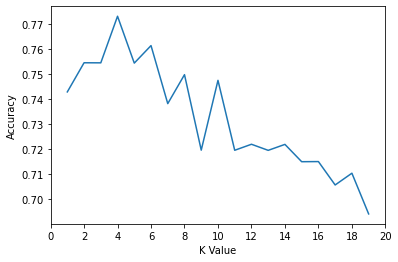

In [10]:
acc = []

for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, fullWordsDf, winLossVals)
    acc.append(np.mean(scores))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(1,20), acc)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])

ax.set_xlabel('K Value')
ax.set_ylabel('Accuracy')
plt.show()

## Naive Bayes

In [11]:
gaussNB = GaussianNB()
scores = accAccrossDS(gaussNB, "Naive Bayes")
if(scores.name not in totalAcc.index):
    totalAcc = totalAcc.append(scores)
else:
    totalAcc.loc[scores.name] = scores

In [12]:
# sorted(sk.metrics.SCORERS.keys())

In [13]:
model = GaussianNB()
skores = sk.model_selection.cross_validate(model, fullWordsDf, winLossVals, cv=cvf, scoring=['accuracy','f1','recall','precision'])
for key in skores:
    print(key,": ",np.mean(skores[key]))

fit_time :  0.028022909164428712
score_time :  0.01647648811340332
test_accuracy :  0.8630769230769231
test_f1 :  0.8965888049288928
test_recall :  0.8982677914173504
test_precision :  0.8960052307476488


## MLP

In [14]:
mlp = MLPClassifier(random_state=randState, hidden_layer_sizes=(50, 25, 25), max_iter=10000)
scores = accAccrossDS(mlp, "MLP")
if(scores.name not in totalAcc.index):
    totalAcc = totalAcc.append(scores)
else:
    totalAcc.loc[scores.name] = scores

In [40]:
model = MLPClassifier()
skores = sk.model_selection.cross_validate(model, combinedHCDf, winLossVals, cv=cvf, scoring=['accuracy','f1','recall','precision'])
for key in skores:
    print(key,": ",np.mean(skores[key]))

fit_time :  0.9178394794464111
score_time :  0.009273052215576172
test_accuracy :  0.9123076923076923
test_f1 :  0.933968366828702
test_recall :  0.9374256016637732
test_precision :  0.9307865168539327


## Decision Tree

In [16]:
decTree = DecisionTreeClassifier(random_state=randState)
scores = accAccrossDS(decTree, "Decision Tree")
if(scores.name not in totalAcc.index):
    totalAcc = totalAcc.append(scores)
else:
    totalAcc.loc[scores.name] = scores

In [37]:
model = DecisionTreeClassifier()
skores = sk.model_selection.cross_validate(model, wordsLessCommon, winLossVals, cv=cvf, scoring=['accuracy','f1','recall','precision'])
for key in skores:
    print(key,": ",np.mean(skores[key]))

fit_time :  0.08715147972106933
score_time :  0.010977983474731445
test_accuracy :  0.8184615384615384
test_f1 :  0.8627010499893325
test_recall :  0.8613180277354295
test_precision :  0.864892881423053


# Ensemble
## Bagging

In [18]:
bagModel = BaggingClassifier(n_estimators=100, random_state=randState)
scores = accAccrossDS(bagModel, "Bagging Classifier")
if(scores.name not in totalAcc.index):
    totalAcc = totalAcc.append(scores)
else:
    totalAcc.loc[scores.name] = scores

In [19]:
model = BaggingClassifier(n_estimators=100, random_state=randState)
skores = sk.model_selection.cross_validate(model, combinedHCDf, winLossVals, cv=cvf, scoring=['accuracy','f1','recall','precision'])
for key in skores:
    print(key,": ",np.mean(skores[key]))

fit_time :  3.1421148777008057
score_time :  0.04431419372558594
test_accuracy :  0.8846153846153845
test_f1 :  0.9136160113960123
test_recall :  0.9195590002085592
test_precision :  0.909130056287613


## Gradient Boost

In [20]:
gradModel = GradientBoostingClassifier(n_estimators=100, random_state=randState)
scores = accAccrossDS(gradModel, "Gradient Boost")
if(scores.name not in totalAcc.index):
    totalAcc = totalAcc.append(scores)
else:
    totalAcc.loc[scores.name] = scores

In [21]:
model = GradientBoostingClassifier(n_estimators=100, random_state=randState)
skores = sk.model_selection.cross_validate(model, combinedHCDf, winLossVals, cv=cvf, scoring=['accuracy','f1','recall','precision'])
for key in skores:
    print(key,": ",np.mean(skores[key]))

fit_time :  2.57946400642395
score_time :  0.008374500274658202
test_accuracy :  0.9092307692307692
test_f1 :  0.9319385330170894
test_recall :  0.9441666960411949
test_precision :  0.920965474568899


## Random Forest

In [22]:
rfModel = RandomForestClassifier(n_estimators=100, random_state=randState)
scores = accAccrossDS(rfModel, "Random Forest")
if(scores.name not in totalAcc.index):
    totalAcc = totalAcc.append(scores)
else:
    totalAcc.loc[scores.name] = scores

In [23]:


model = RandomForestClassifier(n_estimators=100, random_state=randState)
skores = sk.model_selection.cross_validate(model, combinedHCDf, winLossVals, cv=cvf, scoring=['accuracy','f1','recall','precision'])
for key in skores:
    print(key,": ",np.mean(skores[key]))

fit_time :  0.2786887168884277
score_time :  0.017338323593139648
test_accuracy :  0.8953846153846154
test_f1 :  0.9230434206513186
test_recall :  0.9471709905972135
test_precision :  0.9015547538471127


In [43]:
x_train, x_test, y_train, y_test = train_test_split(combinedHCDf, winLossVals, shuffle=True, test_size=0.3)

model = RandomForestClassifier(n_estimators=100, random_state=randState)
model.fit(x_train, x_test)

NameError: name 'train_test_split' is not defined

In [24]:
print(skores)

{'fit_time': array([0.30026674, 0.28486919, 0.26703691, 0.27226996, 0.26900077]), 'score_time': array([0.01695657, 0.01694369, 0.01694417, 0.01792908, 0.01791811]), 'test_accuracy': array([0.87692308, 0.93076923, 0.87692308, 0.89230769, 0.9       ]), 'test_f1': array([0.91208791, 0.94797688, 0.90588235, 0.91954023, 0.92972973]), 'test_recall': array([0.91208791, 0.94252874, 0.9625    , 0.93023256, 0.98850575]), 'test_precision': array([0.91208791, 0.95348837, 0.85555556, 0.90909091, 0.87755102])}


## AdaBoost

In [25]:
adaModel = AdaBoostClassifier(n_estimators=100, random_state=randState)
scores = accAccrossDS(adaModel, "AdaBoost")
if(scores.name not in totalAcc.index):
    totalAcc = totalAcc.append(scores)
else:
    totalAcc.loc[scores.name] = scores

In [26]:
model = AdaBoostClassifier(n_estimators=100, random_state=randState)
skores = sk.model_selection.cross_validate(model, combinedHCDf, winLossVals, cv=cvf, scoring=['accuracy','f1','recall','precision'])
for key in skores:
    print(key,": ",np.mean(skores[key]))

fit_time :  1.248326015472412
score_time :  0.04156527519226074
test_accuracy :  0.9092307692307694
test_f1 :  0.9305553661030604
test_recall :  0.9217111103277904
test_precision :  0.9412199377410191


In [66]:
x_train, x_test, y_train, y_test = train_test_split(wordsNSDf, winLossVals, shuffle=True, test_size=0.3)

model = AdaBoostClassifier(n_estimators=100)
model.fit(x_train, y_train)
imp = model.feature_importances_
attribute = pd.Series(imp, index=wordsNSDf.columns.to_numpy())

# attribute = cols.sort_values(ascending=False)
# print(type(attribute))

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(wordsNSDf, winLossVals, shuffle=True, test_size=0.3)
    model = AdaBoostClassifier(n_estimators=100)
    model.fit(x_train, y_train)
    imp = model.feature_importances_
    attNew = pd.Series(imp, index=wordsNSDf.columns.to_numpy())
    attribute.add(attNew)
    print(i, end=" ")

attribute = attribute.sort_values(ascending=False)
attribute.div(100)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

folks_NNS          0.0005
chance_NN          0.0004
union_NN           0.0003
greater_JJR        0.0003
americans_NPS      0.0003
                    ...  
respect_NN         0.0000
middle-class_NN    0.0000
act_VB             0.0000
building_VBG       0.0000
people_NNS         0.0000
Length: 844, dtype: float64

In [67]:
attribute.head(20)

folks_NNS        0.05
chance_NN        0.04
union_NN         0.03
greater_JJR      0.03
americans_NPS    0.03
office_NN        0.03
change_NN        0.02
become_VB        0.02
mccain_NP        0.02
simple_JJ        0.02
century_NN       0.02
pay_VB           0.02
work_NN          0.02
country_NN       0.02
politics_NN      0.02
america_NP       0.02
everybody_PN     0.02
thank_VB         0.02
best_JJT         0.02
away_RB          0.02
dtype: float64

# SVC

In [27]:
svc = SVC()
scores = accAccrossDS(svc, "SVM")
if(scores.name not in totalAcc.index):
    totalAcc = totalAcc.append(scores)
else:
    totalAcc.loc[scores.name] = scores

In [28]:
svc = SVC()
skores = sk.model_selection.cross_validate(model, combinedHCDf, winLossVals, cv=cvf, scoring=['accuracy','f1','recall','precision'])
for key in skores:
    print(key,": ",np.mean(skores[key]))

fit_time :  1.2453791141510009
score_time :  0.041944026947021484
test_accuracy :  0.9092307692307694
test_f1 :  0.9305553661030604
test_recall :  0.9217111103277904
test_precision :  0.9412199377410191


In [29]:
totalAcc.mean(numeric_only=True)

Full Words                   0.875385
No Stop Words                0.871111
Stan Tags                    0.783932
Deception                    0.693333
Combined                     0.884274
Words in >5 Speeches         0.872137
Complete Combined            0.820684
LDA2 FW                      0.882393
LDA2 CHC                     0.986496
lda1 Full Words              0.987350
lda1 No Stop Words           0.993504
lda1 Stan Tags               0.871111
lda1 Deception               0.771453
lda1 Combined                0.996923
lda1 Words in >5 Speeches    0.983761
lda1 Complete Combined       0.981880
PCA Full Words               0.779316
PCA No Stop Words            0.784615
PCA Stan Tags                0.764615
PCA Deception                0.687863
PCA Combined                 0.821026
PCA Words in >5 Speeches     0.778632
PCA Complete Combined        0.688205
svd5 Full Words              0.775726
svd5 No Stop Words           0.753333
svd5 Stan Tags               0.726496
svd5 Decepti

In [30]:
totalAcc.T

,KNN,Naive Bayes,MLP,Decision Tree,Bagging Classifier,Gradient Boost,Random Forest,AdaBoost,SVM
Full Words,0.863077,0.863077,0.909231,0.796923,0.889231,0.903077,0.886154,0.910769,0.856923
No Stop Words,0.838462,0.867692,0.915385,0.800000,0.855385,0.895385,0.886154,0.884615,0.896923
Stan Tags,0.789231,0.770769,0.663077,0.775385,0.821538,0.832308,0.832308,0.824615,0.746154
Deception,0.655385,0.480000,0.726154,0.678462,0.746154,0.752308,0.766154,0.704615,0.730769
Combined,0.876923,0.860000,0.910769,0.803077,0.884615,0.909231,0.895385,0.909231,0.909231
Words in >5 Speeches,0.861538,0.850769,0.906154,0.804615,0.875385,0.912308,0.876923,0.907692,0.853846
Complete Combined,0.655385,0.832308,0.778462,0.800000,0.890769,0.910769,0.875385,0.909231,0.733846
LDA2 FW,0.893846,0.776923,0.904615,0.895385,0.903077,0.906154,0.906154,0.903077,0.852308
LDA2 CHC,0.995385,0.929231,0.996923,0.992308,0.992308,0.992308,0.995385,0.989231,0.995385
lda1 Full Words,0.989231,0.989231,0.989231,0.986154,0.986154,0.986154,0.986154,0.986154,0.987692


In [31]:
totalAcc

,Full Words,No Stop Words,Stan Tags,Deception,Combined,Words in >5 Speeches,Complete Combined,LDA2 FW,LDA2 CHC,lda1 Full Words,...,PCA Combined,PCA Words in >5 Speeches,PCA Complete Combined,svd5 Full Words,svd5 No Stop Words,svd5 Stan Tags,svd5 Deception,svd5 Combined,svd5 Words in >5 Speeches,svd5 Complete Combined
KNN,0.863077,0.838462,0.789231,0.655385,0.876923,0.861538,0.655385,0.893846,0.995385,0.989231,...,0.876923,0.858462,0.656923,0.789231,0.740000,0.727692,0.773846,0.852308,0.786154,0.696923
Naive Bayes,0.863077,0.867692,0.770769,0.480000,0.860000,0.850769,0.832308,0.776923,0.929231,0.989231,...,0.678462,0.640000,0.638462,0.773846,0.746154,0.761538,0.796923,0.789231,0.772308,0.669231
MLP,0.909231,0.915385,0.663077,0.726154,0.910769,0.906154,0.778462,0.904615,0.996923,0.989231,...,0.883077,0.886154,0.721538,0.663077,0.663077,0.672308,0.793846,0.850769,0.663077,0.707692
Decision Tree,0.796923,0.800000,0.775385,0.678462,0.803077,0.804615,0.800000,0.895385,0.992308,0.986154,...,0.795385,0.709231,0.638462,0.780000,0.715385,0.704615,0.744615,0.813846,0.776923,0.672308
Bagging Classifier,0.889231,0.855385,0.821538,0.746154,0.884615,0.875385,0.890769,0.903077,0.992308,0.986154,...,0.840000,0.775385,0.709231,0.807692,0.793846,0.729231,0.744615,0.846154,0.804615,0.724615
Gradient Boost,0.903077,0.895385,0.832308,0.752308,0.909231,0.912308,0.910769,0.906154,0.992308,0.986154,...,0.847692,0.766154,0.703077,0.803077,0.775385,0.736923,0.760000,0.841538,0.809231,0.712308
Random Forest,0.886154,0.886154,0.832308,0.766154,0.895385,0.876923,0.875385,0.906154,0.995385,0.986154,...,0.741538,0.720000,0.706154,0.800000,0.803077,0.744615,0.744615,0.849231,0.792308,0.718462
AdaBoost,0.910769,0.884615,0.824615,0.704615,0.909231,0.907692,0.909231,0.903077,0.989231,0.986154,...,0.829231,0.758462,0.692308,0.767692,0.756923,0.738462,0.790769,0.824615,0.769231,0.710769
SVM,0.856923,0.896923,0.746154,0.730769,0.909231,0.853846,0.733846,0.852308,0.995385,0.987692,...,0.896923,0.893846,0.727692,0.796923,0.786154,0.723077,0.793846,0.827692,0.787692,0.696923


In [42]:
totalAcc.shape

(9, 30)

In [32]:
for row in totalAcc.T:
    print(max(totalAcc.T[row]), np.argmax(totalAcc.T[row]))

0.9969230769230769 13
0.9969230769230769 13
0.9969230769230769 8
0.9969230769230769 13
0.9969230769230769 13
0.9969230769230769 13
0.9969230769230769 13
0.9969230769230769 13
0.9969230769230769 13


## Assessing Ensemble

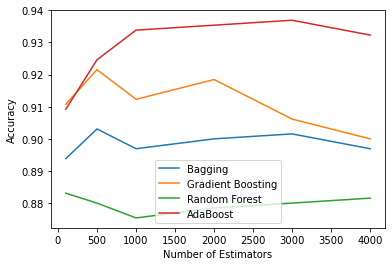

In [41]:
numEstimators = [100, 500, 1000, 2000, 3000, 4000]

bagScores = []
gradBoostScores = []
rfScores = []
adaScores = []
    
for num in numEstimators:
    bagModel = BaggingClassifier(n_estimators=num)
    gradModel = GradientBoostingClassifier(n_estimators=num)
    rfModel = RandomForestClassifier(n_estimators=num)
    adaModel = AdaBoostClassifier(n_estimators=num)
    
    scores = cross_val_score(bagModel, combinedHCDf, winLossVals, cv=cvf)
    bagScores.append(np.mean(scores))
    scores = cross_val_score(gradModel, combinedHCDf, winLossVals, cv=cvf)
    gradBoostScores.append(np.mean(scores))
    scores = cross_val_score(rfModel, combinedHCDf, winLossVals, cv=cvf)
    rfScores.append(np.mean(scores))
    scores = cross_val_score(adaModel, combinedHCDf, winLossVals, cv=cvf)
    adaScores.append(np.mean(scores))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(numEstimators, bagScores, label = "Bagging")
ax.plot(numEstimators, gradBoostScores, label = "Gradient Boosting")
ax.plot(numEstimators, rfScores, label = "Random Forest")
ax.plot(numEstimators, adaScores, label="AdaBoost")

plt.legend()

ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Accuracy')

plt.show()  

In [ ]:
# cvf2 = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# model = AdaBoostClassifier(n_estimators=3000)
# skores = sk.model_selection.cross_validate(model, combinedHCDf, winLossVals, cv=cvf2, scoring=['accuracy','f1','recall','precision'])
# for key in skores:
#     print(key,": ",np.mean(skores[key]))